In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import operator
import pprint
from matplotlib import pyplot as plt
from IPython.display import Math
import pypropep as ppp

In [2]:
plt.style.use(u'ggplot')
plt.rcParams['figure.figsize'] = (10,6)
ppp.init()

Loaded 1921 thermo species
Loaded 1030 propellants


## Rocket Performance
*Finally* we are at the fun stuff.  The next section shows a basic rocket performance example.

In [7]:
p = ppp.ShiftingPerformance()
o2 = ppp.PROPELLANTS['OXYGEN (LIQUID)']
ch4 = ppp.PROPELLANTS['METHANE']
p.add_propellants([(ch4, 1.0), (o2, 1.0)])
p.set_state(P=10, Pe=0.01)
print p

Status:
	Equillibrium Computed: False
	Properties Computed: False
	Performance Computed: False
Composition:
	METHANE - 1.000 mol
	OXYGEN (LIQUID) - 1.000 mol
======= Chamber =======: 
	Pressure: 10.000 atm 
	Temperature: 2549.8 K 
	Enthalpy: -2047.491 kJ/kg 
	Int. Energy: -3376.014 kJ/kg 
	Gibbs Free Energy: -39958.401 kJ/kg 
	Entropy: 14.868 kJ/kg-K 
	Molar Mass: 15.958 g/mol 
	dV_P: -1.002
	dV_T: 1.039
	Cp: 3.156 kJ/kg-K
	Cv: 2.594 kJ/kg-K
	gamma: 1.214
	Sound Speed: 1270.2 m/s
	
	Ae/At: 0.00000
	A/dotm: 0.00000 m/s/atm
	C*: 0.00000 m/s
	Cf: 0.00000
	Ivac (m/s): 0.00000
	Isp (m/s): 0.00000
	Isp/g (s): 0.00000

======= Throat =======: 
	Pressure: 5.586 atm 
	Temperature: 2298.8 K 
	Enthalpy: -2782.013 kJ/kg 
	Int. Energy: -3977.218 kJ/kg 
	Gibbs Free Energy: -36960.784 kJ/kg 
	Entropy: 14.868 kJ/kg-K 
	Molar Mass: 15.991 g/mol 
	dV_P: -1.001
	dV_T: 1.017
	Cp: 2.875 kJ/kg-K
	Cv: 2.337 kJ/kg-K
	gamma: 1.229
	Sound Speed: 1212.0 m/s
	
	Ae/At: 1.00000
	A/dotm: 176.53844 m/s/atm
	C*: 1765.

In [4]:
for k,v in p.composition.items():  
    print "{} : ".format(k)
    pprint.pprint(v[0:8], indent=4)

throat : 
[   ('H2', 0.37263597847966284),
    ('CO', 0.2920224927702461),
    ('H2O', 0.2917108200221283),
    ('CO2', 0.04084551121831797),
    ('H', 0.0024715563625845004),
    ('OH', 0.0003104313373908468),
    ('O', 1.4021019220061718e-06),
    ('HCO', 7.950588674185989e-07)]
chamber : 
[   ('H2', 0.36701556664897517),
    ('CO', 0.29487842470771897),
    ('H2O', 0.2938237346629334),
    ('CO2', 0.03728394422678421),
    ('H', 0.0059409960267065584),
    ('OH', 0.001039337723138424),
    ('O', 1.0948327704945675e-05),
    ('O2', 3.5795004840845113e-06)]
exit : 
[   ('H2', 0.5246327804379185),
    ('CO2', 0.21507469955831926),
    ('H2O', 0.13524095695629104),
    ('CO', 0.11486216913877276),
    ('CH4', 0.010189393909261954),
    ('CH3COOH', 0.0),
    ('C4H8,cyclo-', 0.0),
    ('CH3OH', 0.0)]


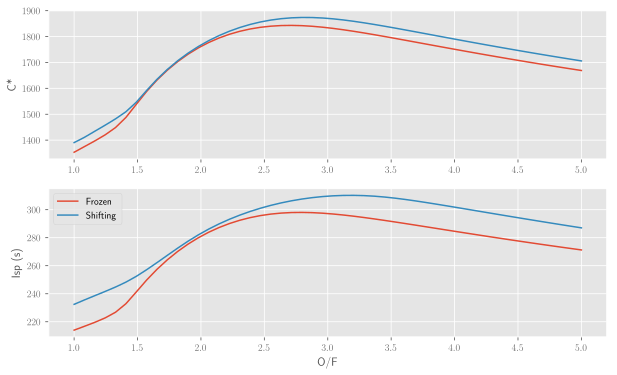

In [11]:
OF = np.linspace(1, 5)
N_CH4 = 1.0 / ch4.mw
cstar_fr = []
cstar_sh = []
Isp_fr = []
Isp_sh = []
for i in xrange(len(OF)):
    p = ppp.FrozenPerformance()
    psh = ppp.ShiftingPerformance()
    
    N_O2 = OF[i] / o2.mw
    
    p.add_propellants([(ch4, N_CH4), (o2, N_O2)])
    psh.add_propellants([(ch4, N_CH4), (o2, N_O2)])
    
    p.set_state(P=1000./14.7, Pe=1)
    psh.set_state(P=1000./14.7, Pe=1)
    
    cstar_fr.append(p.performance.cstar)
    Isp_fr.append(p.performance.Isp/9.8)
    
    cstar_sh.append(psh.performance.cstar)
    Isp_sh.append(psh.performance.Isp/9.8)

ax = plt.subplot(211)
ax.plot(OF, cstar_fr, label='Frozen')
ax.plot(OF, cstar_sh, label='Shifting')
ax.set_ylabel('C*')
ax1 = plt.subplot(212, sharex=ax)
ax1.plot(OF, Isp_fr, label='Frozen')
ax1.plot(OF, Isp_sh, label='Shifting')
ax1.set_ylabel('Isp (s)')
plt.xlabel('O/F')
plt.legend(loc='best')

### Equilibrium with condensed species

In [12]:
kno3 = ppp.PROPELLANTS['POTASSIUM NITRATE']
sugar = ppp.PROPELLANTS['SUCROSE (TABLE SUGAR)']
p = ppp.ShiftingPerformance()
p.add_propellants([(kno3, 0.65), (sugar, 0.35)])
p.set_state(P=30, Pe=1.)

for k,v in p.composition.items():  
    print "{} : ".format(k)
    pprint.pprint(v[0:8], indent=4)

throat : 
[   ('H2', 0.19962886578275763),
    ('H2O', 0.1832699240079824),
    ('CO2', 0.1687718210985957),
    ('CO', 0.13708941257922932),
    ('CH4', 0.07085903123026227),
    ('N2', 0.044205983021330546),
    ('NH3', 0.00021675890168605297),
    ('C2H6', 5.1088973306572406e-06)]
chamber : 
[   ('H2', 0.19866474899448275),
    ('H2O', 0.17946087050543963),
    ('CO2', 0.16211357540421079),
    ('CO', 0.15927651650008237),
    ('CH4', 0.07521552960777306),
    ('N2', 0.04451743293303023),
    ('NH3', 0.00027501752509399727),
    ('C2H6', 8.384159357884596e-06)]
exit : 
[   ('H2O', 0.20738478361930934),
    ('CO2', 0.19326219244261356),
    ('H2', 0.19211919597834898),
    ('CH4', 0.0556462086366686),
    ('CO', 0.0463653179354007),
    ('N2', 0.04309561553659376),
    ('NH3', 6.336055630408139e-05),
    ('C2H6', 3.82728072053896e-07)]


### Another condensed species case
Remember the awesome video (https://www.youtube.com/watch?v=aJnrFKUz1Uc) of the RL-10 with liquid water dripping from exhaust?  Let's see if we can show that this happens thermodynamically...
